# **Name: Varun Magotra**
# **Roll Number: 14**
# **Batch: A**

## Exp 4] Analyze statistical data using Python/R programming
### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset - Medical Costs Personal Data

In [2]:
df = pd.read_csv('Data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# !pip install --upgrade pandas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (1338, 7)


The dataset has 1338 rows and 7 columns with 'charges' as the target column

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Descriptive Statistics

In [8]:
df_descrb = df.describe().T
df_descrb

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


The above table shows the various descriptive statistical features such as the count, mean, standard deviation along with the maximum and minimum values and the quartiles (25%, 50% i.e. median, 75%)

In [9]:
df_descrb.index

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
print('Range for age variable:',df_descrb.loc['age']['max']-df_descrb.loc['age']['min'])
print('Range for bmi variable:',df_descrb.loc['bmi']['max']-df_descrb.loc['bmi']['min'])
print('Range for children variable:',df_descrb.loc['children']['max']-df_descrb.loc['children']['min'])
print('Range for charges variable:',df_descrb.loc['charges']['max']-df_descrb.loc['charges']['min'])

Range for age variable: 46.0
Range for bmi variable: 37.17
Range for children variable: 5.0
Range for charges variable: 62648.554110000005


In [11]:
df.skew(axis = 0, skipna = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

We can see that skew value for age is very low

Skew for charges is positive and high so, it is skewed right or positively skewed, even the bmi and children attributes distribution is positively skewed but bmi attribute is not much skewed compared to children.

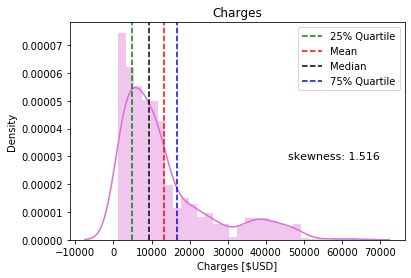

In [12]:
sns.distplot(df['charges'], color='orchid');
plt.axvline(df['charges'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
plt.axvline(df['charges'].mean(),color='red',linestyle='--',label='Mean');
plt.axvline(df['charges'].median(),color='black',linestyle='--',label='Median');
plt.axvline(df['charges'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
plt.text(70000, 3e-5, 'skewness: {}' .format(str(round(df['charges'].skew(),3))), ha='right', va='center', size=11)
plt.title('Charges');
plt.xlabel('Charges [$USD]');
plt.legend();

Charges target attribute has Right skewed distribution

Skewness: 0.056


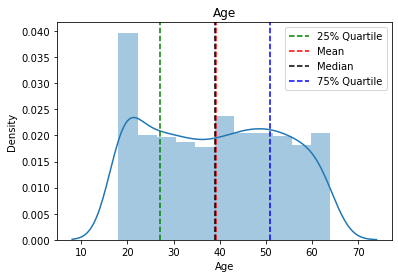

In [13]:
sns.distplot(df['age']);
plt.axvline(df['age'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
plt.axvline(df['age'].mean(),color='red',linestyle='--',label='Mean');
plt.axvline(df['age'].median(),color='black',linestyle='--',label='Median');
plt.axvline(df['age'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
plt.title('Age');
plt.xlabel('Age');
plt.legend();
print('Skewness:',round(df['age'].skew(),3))

Age attribute has a very low skew value but is not even close to a normal distribution

Skewness: 0.284


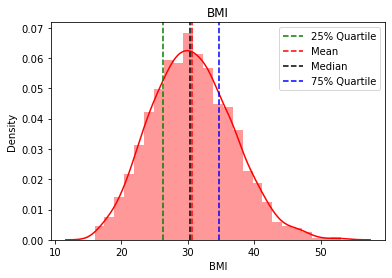

In [14]:
sns.distplot(df['bmi'], color='red');
plt.axvline(df['bmi'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
plt.axvline(df['bmi'].mean(),color='red',linestyle='--',label='Mean');
plt.axvline(df['bmi'].median(),color='black',linestyle='--',label='Median');
plt.axvline(df['bmi'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
plt.title('BMI');
plt.xlabel('BMI');
plt.legend();
print('Skewness:',round(df['bmi'].skew(),3))


BMI attribute has almost symmetrical distribution, very close to normal distribution

## Hypothesis Testing
**Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.**
Let μ1, μ2 and be the respective population means for BMI of males and BMI of females

**Step 1:** Define null and alternative hypothesis

H0: μ1−μ2=0 There is no difference between the BMI of Male and BMI of female.

Ha: μ1−μ2!=0 There is difference between the BMI of Male and BMI of female.

**Step 2:** Decide the significance level: α = 0.05

**Step 3:** Identify the test: Independent T-test

A t-test is used to compare the mean of two given samples. Like a z-test, a t-test also assumes a normal distribution of the sample. A t-test is used when the population parameters (mean and standard deviation) are not known.

Independent T-Test: Independent samples t-test which compares mean for two groups.

**Step 4:** Calculate the test-statistics and p-value

Here, the test-statistic is called t-statistic, the score for which is calculated as:

**t = (x1 — x2) / (σ / √n1 + σ / √n2)**

where

x1 = mean of sample 1

x2 = mean of sample 2

n1 = size of sample 1

n2 = size of sample 2

Mean BMI for Males = 30.943128698224854
Mean BMI for Females = 30.37774924471299


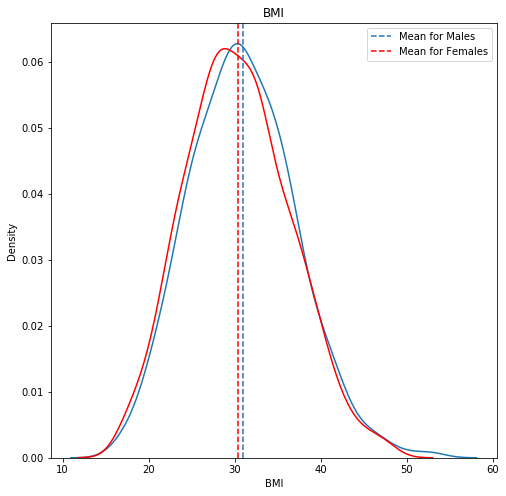

In [15]:
df_male = df[df['sex']=='male']
df_female = df[df['sex']=='female']
bmi_female = df_female.bmi
bmi_male = df_male.bmi
alpha = 0.05

plt.figure(figsize=(8,8))
sns.distplot(df_male['bmi'], hist=False);
sns.distplot(df_female['bmi'], hist=False, color='red');
plt.axvline(df_male['bmi'].mean(),linestyle='--',label='Mean for Males');
plt.axvline(df_female['bmi'].mean(),color='red',linestyle='--',label='Mean for Females');
plt.title('BMI');
plt.xlabel('BMI');
plt.legend();
print('Mean BMI for Males =',df_male['bmi'].mean())
print('Mean BMI for Females =',df_female['bmi'].mean())

In [16]:
from scipy import stats
ind_t_stat, p_value = stats.ttest_ind(bmi_male, bmi_female)
in_t_stat = round(ind_t_stat,3)
p_value = round(p_value,3)
print("t-statistic =",round(ind_t_stat,3))
print("p-value =",round(p_value,3))

t-statistic = 1.697
p-value = 0.09


In [17]:
if p_value<alpha :
    print("Conclusion: Since P value {} is less than alpha {} ".format(p_value,alpha))
    print("Reject Null Hypothesis i.e. that there is no difference in bmi of men and bmi of female")
    
else:
    print("Conclusion: Since P value {} is greater than alpha {} ".format(p_value,alpha))
    print("Failed to Reject Null Hypothesis i.e. there is difference in bmi of men and bmi of female")

Conclusion: Since P value 0.09 is greater than alpha 0.05 
Failed to Reject Null Hypothesis i.e. there is difference in bmi of men and bmi of female


**Step 5: Decide to reject or accept null hypothesis**

The observation is that p-value(0.09) is greater than the significance level alpha(0.05).

### Conclusion
Hence, I failed to reject the null hypothesis and I conclude that there is no difference between BMI of Females and BMI of Males. This is commensurate with our general intuition that the average BMI of males and females will be similar as it takes into account both the height and weight of a person. Generally males are taller than females but their weight also is higher, hence we can say that they balance each other out leading to a similar BMI as that of females.